In [22]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from pathlib import Path

from PIL.ImageColor import colormap

np.random.seed(42)

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

$\frac{1}{2}\sum_{i=1}$

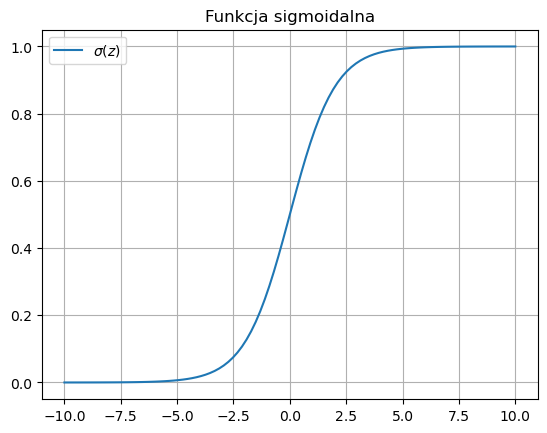

In [24]:
x=np.linspace(-10,10,100)
plt.plot(x,sigmoid(x), label = fr"$\sigma (z)$")
plt.grid(True)
plt.legend()
plt.title("Funkcja sigmoidalna")
plt.show()

In [25]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [26]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [27]:
iris.target.unique()

array([0, 1, 2])

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica'

In [30]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X=X_train, y=y_train)

LogisticRegression(random_state=42)

In [32]:

log_reg.coef_

array([[-0.37075602, -0.50440372,  2.72707974,  2.02082242]])

In [33]:
log_reg.intercept_

array([-12.92813041])

In [34]:
y_pred = log_reg.predict(X=X_test)
y_pred

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False])

In [35]:
log_reg.predict_proba(X=X_test)

array([[7.95728950e-01, 2.04271050e-01],
       [9.99991837e-01, 8.16299257e-06],
       [1.70865203e-03, 9.98291348e-01],
       [7.87905265e-01, 2.12094735e-01],
       [7.19597828e-01, 2.80402172e-01],
       [9.99992081e-01, 7.91900582e-06],
       [9.82408280e-01, 1.75917197e-02],
       [1.81532379e-01, 8.18467621e-01],
       [7.37577123e-01, 2.62422877e-01],
       [9.67067473e-01, 3.29325267e-02],
       [2.69410577e-01, 7.30589423e-01],
       [9.99994974e-01, 5.02552015e-06],
       [9.99997193e-01, 2.80716303e-06],
       [9.99993952e-01, 6.04795343e-06],
       [9.99994090e-01, 5.91002909e-06],
       [7.06373363e-01, 2.93626637e-01],
       [3.19343967e-02, 9.68065603e-01],
       [9.67918171e-01, 3.20818295e-02],
       [8.25611985e-01, 1.74388015e-01],
       [4.72384465e-02, 9.52761553e-01],
       [9.99990044e-01, 9.95641512e-06],
       [4.26237748e-01, 5.73762252e-01],
       [9.99987935e-01, 1.20645561e-05],
       [5.72121865e-02, 9.42787813e-01],
       [2.363476

In [36]:
log_reg.score(X=X_test, y=y_test)

1.0

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=log_reg.classes_)
cm

array([[26,  0],
       [ 0, 12]])

In [38]:
cm_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred, labels=log_reg.classes_))
cm_df

,0,1
0,26,0
1,0,12


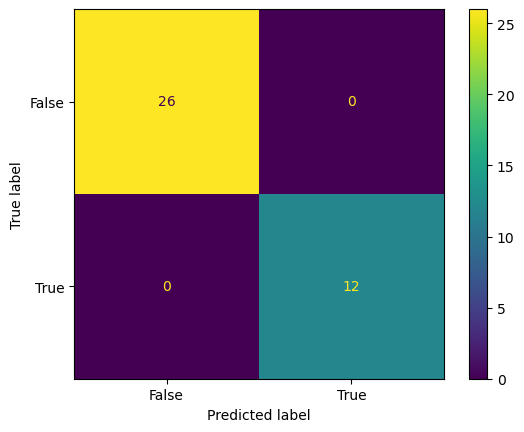

In [39]:
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_reg.classes_
)
cm_display.plot()

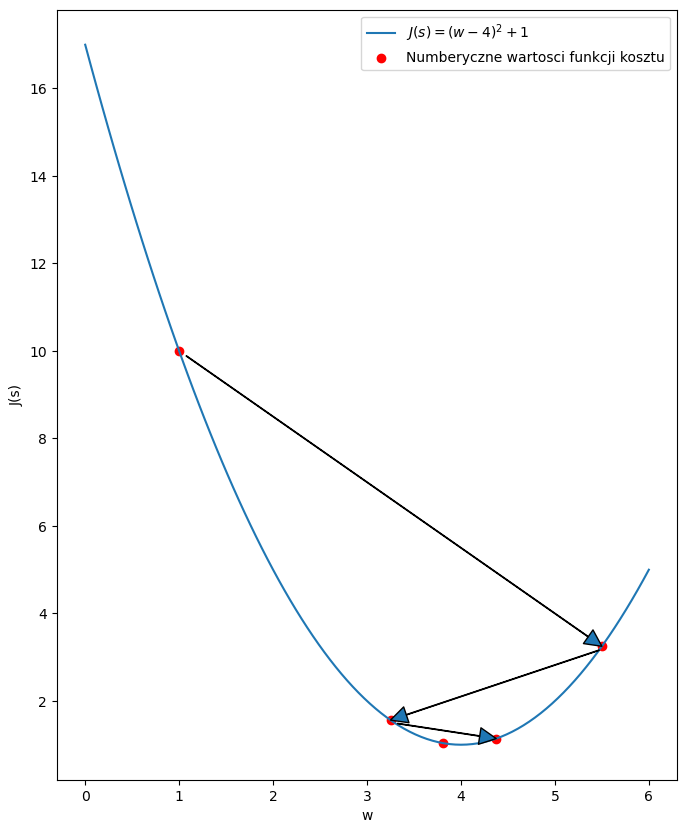

In [45]:
def JFunction(w):
    return (w-4)**2+1
def JDerivative(w):
    return 2*(w-4)

# popdunkt a) lambca = 1/3 lub 3/4
lr = 3/4
n_iter = 4
w = 1 
w_ls = [w]
J_ls = [JFunction(w)] # koszty
for i in range(n_iter):
    w = w - lr*JDerivative(w)
    w_ls.append(w)
    J_ls.append(JFunction(w))
    
w_ls

x=np.linspace(0,6,100)
plt.figure(figsize=(8,10))
plt.plot(x,JFunction(x), label = fr"$J(s)=(w-4)^2+1$")
plt.scatter(w_ls, J_ls, color='red', label="Numberyczne wartosci funkcji kosztu")
for i in range(n_iter-1):
    plt.annotate(" ", xy=(w_ls[i+1], J_ls[i+1]), xytext=(w_ls[i], J_ls[i]), arrowprops={"width": 0.3})

plt.xlabel("w")
plt.ylabel("J(s)")
plt.legend()
plt.show()